In [98]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

# tree based algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [99]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [100]:
train_df.columns

Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_ol

In [101]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [102]:
# Convert categorical data to numeric and separate target feature for training data
X_train = train_df.drop(["loan_status",'Unnamed: 0', 'index'],axis=1)
X_train = pd.get_dummies(X_train)
y_train = train_df["loan_status"]

In [103]:
X_train.head()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0,1,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0,1,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0,1,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,1,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0,1,0,1,1,0,1,0,1,0


In [104]:
# Convert categorical data to numeric and separate target feature for testing data
X_test = test_df.drop(["loan_status",'Unnamed: 0', 'index'],axis=1)
X_test = pd.get_dummies(X_test)
y_test = test_df["loan_status"]

In [105]:
# add missing dummy variables to testing set
missing_column = list(set(X_train.columns) - set(X_test.columns))[0]
X_test[missing_column] = 0

In [106]:
X_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,1,0,1,1,0,1,0,1,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,1,0,1,1,0,1,0,1,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,1,0,1,1,0,1,0,1,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,1,0,1,1,0,1,0,1,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,1,0,1,1,0,1,0,1,0


In [107]:
train_df.loan_status.value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

In [108]:
str_cols = []

for col in train_df.columns:
    if (train_df[col].dtype == object) & (col != "loan_status"):
        print(col)
        str_cols.append(col)
        
df_str = train_df.loc[:, str_cols]
df_str.head()

home_ownership
verification_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag


,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [109]:
for col in df_str.columns:
    print(col)
    print(df_str[col].value_counts())
    print()

home_ownership
MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64

verification_status
Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64

pymnt_plan
n    12180
Name: pymnt_plan, dtype: int64

initial_list_status
w    11158
f     1022
Name: initial_list_status, dtype: int64

application_type
Individual    10400
Joint App      1780
Name: application_type, dtype: int64

hardship_flag
N    11832
Y      348
Name: hardship_flag, dtype: int64

debt_settlement_flag
N    12175
Y        5
Name: debt_settlement_flag, dtype: int64



In [110]:
# only 1 category essentially...
df_str.drop(["pymnt_plan", "debt_settlement_flag"], axis=1, inplace=True)

In [111]:
# label encode
df_le = df_str.loc[:, ["initial_list_status", "application_type", "hardship_flag"]]
df_le["initial_list_status"] = [1 if x == "f" else 0 for x in df_le.initial_list_status]
df_le["application_type"] = [1 if x == "Joint App" else 0 for x in df_le.application_type]
df_le["hardship_flag"] = [1 if x == "Y" else 0 for x in df_le.hardship_flag]

df_le.head()

,initial_list_status,application_type,hardship_flag
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [112]:
df_oh = pd.get_dummies(df_str.loc[:, ["home_ownership", "verification_status"]])
df_oh.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,0,0,1,1,0,0
4,0,1,0,0,0,1,0


In [113]:
num_cols = []

for col in train_df.columns:
    if (train_df[col].dtype != object) & (col != "loan_status"):
        print(col)
        num_cols.append(col)
        
df_num = train_df.loc[:, num_cols]
df_num.head()

Unnamed: 0
index
loan_amnt
int_rate
installment
annual_inc
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
collections_12_mths_ex_med
policy_code
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [114]:
scaler = StandardScaler().fit(df_num)
df_scale = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
df_scale = df_num.copy()
df_scale.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0


In [115]:
df_train = pd.concat([df_scale, df_oh, df_le], axis=1)
df_train["loan_status"] = train_df.loan_status

df_train["loan_status"] = [1 if x == "high_risk" else 0 for x in df_train.loan_status]
df_train.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,1,0,0,1,0,0,0,0,0,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,1,0,0,0,1,0,0,0,0,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,1,0,0,0,1,0,0,0,0,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,0,0,1,1,0,0,0,0,0,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,1,0,0,0,1,0,0,0,0,0


In [116]:
corrs = abs(df_train.corr())["loan_status"].sort_values(ascending=False)
corrs

loan_status                1.000000
int_rate                   0.241308
total_rec_int              0.208996
index                      0.176015
Unnamed: 0                 0.176015
                             ...   
recoveries                      NaN
collection_recovery_fee         NaN
policy_code                     NaN
num_tl_120dpd_2m                NaN
tax_liens                       NaN
Name: loan_status, Length: 89, dtype: float64

In [117]:
corrs.index

Index(['loan_status', 'int_rate', 'total_rec_int', 'index', 'Unnamed: 0',
       'total_rec_late_fee', 'out_prncp_inv', 'out_prncp', 'installment',
       'acc_open_past_24mths', 'inq_last_6mths', 'hardship_flag',
       'num_tl_op_past_12m', 'mths_since_recent_inq', 'inq_last_12m',
       'total_bc_limit', 'open_rv_24m', 'bc_open_to_buy',
       'mo_sin_old_rev_tl_op', 'total_rec_prncp', 'open_acc_6m', 'open_rv_12m',
       'mo_sin_rcnt_rev_tl_op', 'max_bal_bc', 'inq_fi', 'last_pymnt_amnt',
       'percent_bc_gt_75', 'home_ownership_MORTGAGE', 'loan_amnt', 'all_util',
       'mths_since_recent_bc', 'total_rev_hi_lim', 'mort_acc',
       'mo_sin_rcnt_tl', 'il_util', 'open_il_24m', 'open_il_12m', 'bc_util',
       'mo_sin_old_il_acct', 'delinq_2yrs', 'verification_status_Verified',
       'home_ownership_RENT', 'pct_tl_nvr_dlq', 'total_pymnt_inv',
       'total_pymnt', 'tot_hi_cred_lim', 'home_ownership_OWN',
       'num_actv_rev_tl', 'num_rev_tl_bal_gt_0',
       'verification_status_N

In [118]:
# NULL or LOW correlations <.01
cols_to_drop = ['num_sats', 'open_acc',
       'num_tl_90g_dpd_24m', 'delinq_amnt', 'acc_now_delinq', 'num_tl_30dpd',
       'annual_inc', 'chargeoff_within_12_mths', 'total_il_high_credit_limit',
       'total_bal_ex_mort', 'tot_coll_amt', 'pub_rec',
       'pub_rec_bankruptcies', 'total_acc', 'num_il_tl', 'recoveries',
       'collection_recovery_fee', 'policy_code', 'num_tl_120dpd_2m', 'tax_liens']

cols_keep = [x for x in df_train if x not in cols_to_drop]
df_train = df_train.loc[:, cols_keep]
df_train.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,57107,57107,13375.0,0.1797,483.34,29.99,0.0,0.0,39728.0,12804.66,...,1,0,0,1,0,0,0,0,0,0
1,141451,141451,21000.0,0.1308,478.68,11.26,2.0,0.0,9585.0,15152.97,...,1,0,0,0,1,0,0,0,0,0
2,321143,321143,20000.0,0.1240,448.95,11.28,0.0,0.0,16708.0,15724.23,...,1,0,0,0,1,0,0,0,0,0
3,11778,11778,3000.0,0.1240,100.22,18.08,0.0,0.0,8809.0,2930.77,...,0,0,1,1,0,0,0,0,0,0
4,169382,169382,30000.0,0.1612,1056.49,27.77,0.0,2.0,65420.0,20778.03,...,1,0,0,0,1,0,0,0,0,0


In [119]:
df_test = test_df.copy()

df_str_test = df_test.loc[:, str_cols]

# only 1 category essentially...
df_str_test.drop(["pymnt_plan", "debt_settlement_flag"], axis=1, inplace=True)

# label encode
df_le_test = df_str_test.loc[:, ["initial_list_status", "application_type", "hardship_flag"]]
df_le_test["initial_list_status"] = [1 if x == "f" else 0 for x in df_le_test.initial_list_status]
df_le_test["application_type"] = [1 if x == "Joint App" else 0 for x in df_le_test.application_type]
df_le_test["hardship_flag"] = [1 if x == "Y" else 0 for x in df_le_test.hardship_flag]

df_le_test.head()


,initial_list_status,application_type,hardship_flag
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [120]:
df_oh_test = pd.get_dummies(df_str_test.loc[:, ["home_ownership", "verification_status"]])
df_oh_test.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,1,0,0,1,0,0
1,0,0,0,1,1,0,0
2,0,0,0,1,1,0,0
3,0,0,0,1,1,0,0
4,0,0,0,1,1,0,0


In [121]:
df_num_test = df_test.loc[:, num_cols]
df_scale_test = pd.DataFrame(scaler.transform(df_num_test), columns=df_num_test.columns)
df_scale_test = df_num_test.copy()
df_scale_test.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0


In [122]:
df_test= pd.concat([df_scale_test, df_oh_test, df_le_test], axis=1)
df_test["loan_status"] = test_df.loan_status

df_test["loan_status"] = [1 if x == "high_risk" else 0 for x in df_test.loan_status]
df_test.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,1,0,0,1,0,0,0,0,0,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,0,1,1,0,0,0,0,0,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,0,1,1,0,0,0,0,0,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,0,1,1,0,0,0,0,0,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,0,1,1,0,0,0,0,0,0


In [123]:
df_test = df_test.loc[:, cols_keep]
df_test.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,revol_bal,out_prncp,...,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status,application_type,hardship_flag,loan_status
0,67991,67991,40000.0,0.0819,814.70,19.75,0.0,1.0,9471.0,33249.95,...,1,0,0,1,0,0,0,0,0,0
1,25429,25429,6000.0,0.1524,208.70,11.52,2.0,0.0,1280.0,0.00,...,0,0,1,1,0,0,0,0,0,0
2,38496,38496,3600.0,0.1695,128.27,6.74,0.0,0.0,4757.0,0.00,...,0,0,1,1,0,0,0,0,0,0
3,19667,19667,20000.0,0.1524,478.33,12.13,0.0,2.0,12731.0,17624.06,...,0,0,1,1,0,0,0,0,0,0
4,37505,37505,3600.0,0.1240,120.27,16.08,0.0,3.0,10413.0,0.00,...,0,0,1,1,0,0,0,0,0,0


In [124]:
X_train = df_train.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_train = df_train["loan_status"].values

X_test = df_test.drop(["loan_status", "home_ownership_ANY", "verification_status_Not Verified"], axis=1).values
y_test = df_test["loan_status"].values

In [125]:
def evaluateModel(model, X_train, y_train, X_test, y_test):
    # FIT THE MODEL
    model.fit(X_train, y_train)

    # EVALUATE the MODEL
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # PRINT the METRICS
    print("TRAINING SET")

    class_report_train = classification_report(y_train, train_preds)
    conf_matrix_train = confusion_matrix(y_train, train_preds)

    print(class_report_train)
    print(conf_matrix_train)

    print()

    # PRINT the METRICS
    print("Testing SET")

    class_report_test = classification_report(y_test, test_preds)
    conf_matrix_test = confusion_matrix(y_test, test_preds)

    print(class_report_test)
    print(conf_matrix_test)
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(10,6))
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Test Set")
    plt.legend(loc=4)
    plt.show()
    
    return(model)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TRAINING SET
              precision    recall  f1-score   support

           0       0.66      0.61      0.64      6090
           1       0.64      0.69      0.66      6090

    accuracy                           0.65     12180
   macro avg       0.65      0.65      0.65     12180
weighted avg       0.65      0.65      0.65     12180

[[3719 2371]
 [1876 4214]]

Testing SET
              precision    recall  f1-score   support

           0       0.51      0.84      0.63      2351
           1       0.55      0.20      0.29      2351

    accuracy                           0.52      4702
   macro avg       0.53      0.52      0.46      4702
weighted avg       0.53      0.52      0.46      4702

[[1967  384]
 [1884  467]]


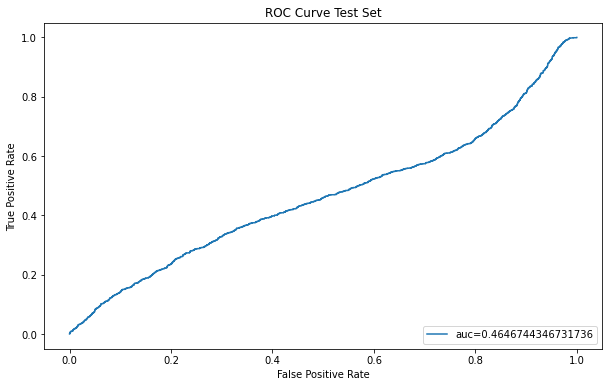

In [126]:
 # Initialize the model
lr = LogisticRegression()
lr = evaluateModel(lr, X_train, y_train, X_test, y_test)

In [127]:
# Train a Random Forest Classifier model and print the model score

In [128]:
# Scale the data

In [129]:
# Train the Logistic Regression model on the scaled data and print the model score

In [130]:
# Train a Random Forest Classifier model on the scaled data and print the model score